In [40]:
import pandas as pd
import numpy as np
import hist
import matplotlib as mpl
import mplhep
import mplhep.error_estimation
# mpl.style.use(mplhep.style.ROOT)
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
from pflib.ana.read import read_pflib_csv

In [71]:
s, rp = read_pflib_csv('pflib/data/charge-time-scan-2025-06-04-190042.csv')

In [42]:
def plt_pulse(
    samples,
    time = 'time',
    amplitude = 'adc',
    set_xticks = True,
    ax = None,
    **kwargs
):
    df = samples.sort_values(by=time)
    if ax is None:
        ax = plt.gca()
    art = ax.plot(df[time], df[amplitude], **kwargs)
    if set_xticks:
        xmin, xmax = df[time].min(), df[time].max()
        xmin = 25*np.floor(xmin/25)
        xmax = 25*np.ceil(xmax/25)
        ax.set_xticks(ticks = np.arange(xmin, xmax+1, 25), minor=False)
        ax.set_xticks(ticks = np.arange(xmin, xmax, 25/16), minor=True)
    return art

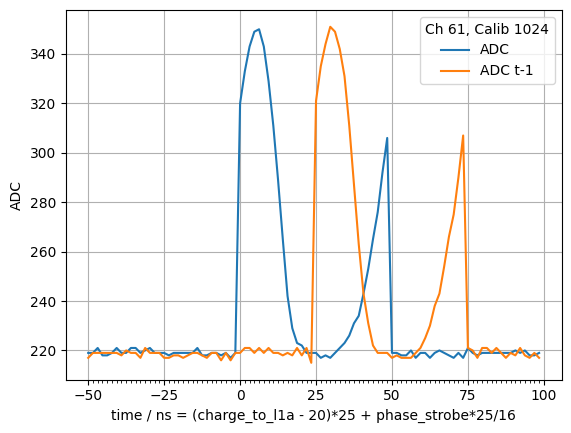

In [44]:
s['time'] = (s.charge_to_l1a - 20)*25 + s.phase_strobe*25/16
plt_pulse(s, label='ADC')
plt_pulse(s, amplitude='adc_tm1', set_xticks=False, label='ADC t-1')
plt.xlabel('time / ns = (charge_to_l1a - 20)*25 + phase_strobe*25/16')
plt.ylabel('ADC')
plt.legend(title='Ch 61, Calib 1024')
plt.grid()
plt.show()

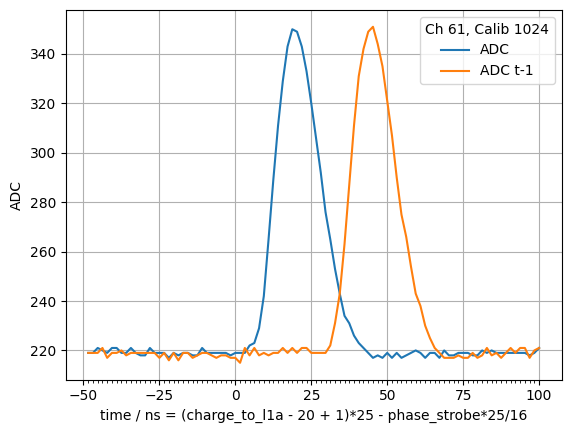

In [45]:
s['time_inv'] = (s.charge_to_l1a - 20 + 1)*25 - s.phase_strobe*25/16
plt_pulse(s, time='time_inv', label='ADC')
plt_pulse(s, time='time_inv', amplitude='adc_tm1', label='ADC t-1')
plt.xlabel('time / ns = (charge_to_l1a - 20 + 1)*25 - phase_strobe*25/16')
plt.ylabel('ADC')
plt.legend(title='Ch 61, Calib 1024')
plt.grid()
plt.show()

In [54]:
s = pd.read_csv(
    'pflib/data/charge-time-scan-2025-06-04-180319.csv',
    skiprows = 1 # skip comment row at top
)
s['time'] = (s.charge_to_l1a - 20 + 1)*25 - s.phase_strobe*25/16
s['time_ck'] = (s.charge_to_l1a - 20 + 1)*25 + s.phase_ck*25/16

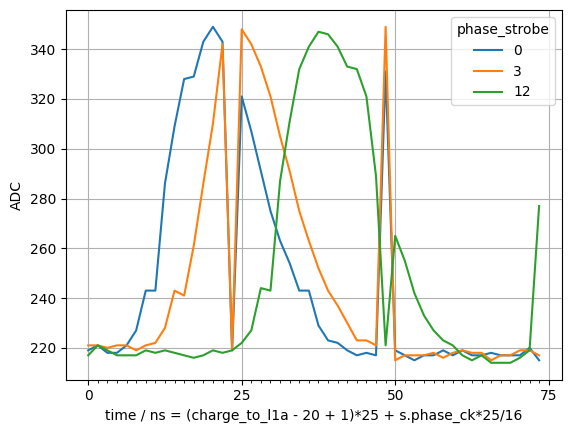

In [58]:
plt_pulse(s[s.phase_strobe==0], time='time_ck', label='0')
plt_pulse(s[s.phase_strobe==3], time='time_ck', label='3', set_xticks=False)
plt_pulse(s[s.phase_strobe==12], time='time_ck', label='12', set_xticks=False)
plt.ylabel('ADC')
plt.xlabel('time / ns = (charge_to_l1a - 20 + 1)*25 + s.phase_ck*25/16')
plt.legend(title='phase_strobe')
plt.grid()
plt.show()